In [1]:
# Import package
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'PS_20174392719_1491204439457_log.csv'
path = '../Data/'

In [3]:
paysim = pd.read_csv(path+file)

In [4]:
paysim.shape

(6362620, 11)

In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
paysim.isnull().values.any()

False

In [7]:
# Determine Null values
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# rename type, is a reserved python word & inconsistent column name 
paysim.rename(columns={'type':'transType', 'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
print(format(paysim.transType.value_counts()),",")

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64 ,


In [10]:
print(format(paysim.isFraud.value_counts()),",")

0    6354407
1       8213
Name: isFraud, dtype: int64 ,


In [11]:
# Origination to Destination does not match
print('Orgination:  ' + format(paysim.nameOrig.nunique(), ','))
print('Destination: ' + format(paysim.nameDest.nunique(), ','))

Orgination:  6,353,307
Destination: 2,722,362


In [12]:
paysim['diffBalanceOrig'] = paysim.newbalanceOrig + paysim.amount - paysim.oldbalanceOrig
paysim['diffBalanceDest'] = paysim.oldbalanceDest + paysim.amount - paysim.newbalanceDest

In [13]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,11668.14


In [14]:
paysim.transType.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: transType, dtype: float64

<AxesSubplot:ylabel='isFraud'>

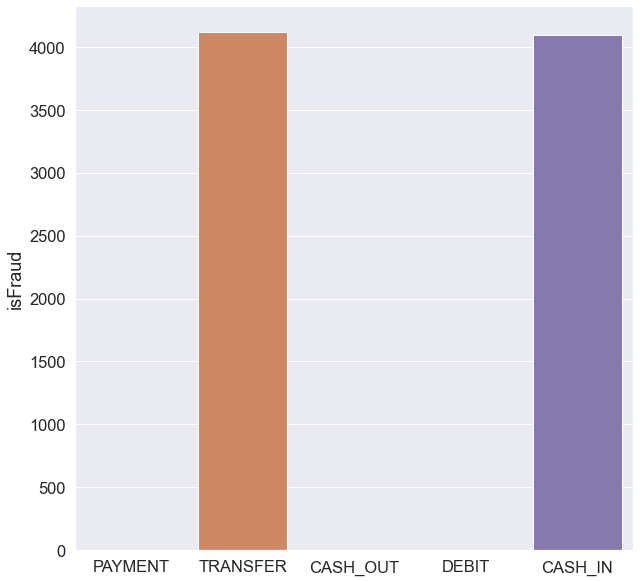

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
sns.barplot(x=paysim.transType.unique(),y=paysim.groupby("transType")["isFraud"].sum())

In [16]:
paysim['nameOrig'] = [x[0] for x in paysim['nameOrig']]
paysim['nameDest'] = [x[0] for x in paysim['nameDest']]

In [17]:
#  All the Fruad is in Transfer and Cash_In transaction types
# paysim.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1, inplace=True)
paysim.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [18]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [19]:
paysim['nameOrig'].value_counts(dropna=False)
paysim['nameDest'].value_counts(dropna=False)

C    4211125
M    2151495
Name: nameDest, dtype: int64

In [20]:
paysim = pd.get_dummies(paysim)

In [21]:
# Add dummy columns
# paysim[['cash_out','payment','cash_in','transfer','debit']] = [0.0,0.0,0.0,0.0,0.0]

In [22]:
# cols = ['cash_out','payment','cash_in','transfer','debit']
# for col in cols:
#     paysim.loc[paysim['transType'] == str.upper(col), col] = 1.0

In [23]:
paysim.sample(10)

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,transType_CASH_IN,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameOrig_C,nameDest_C,nameDest_M
5237351,371,323246.48,0.00,0.00,758854.02,1419304.34,0,323246.48,-337203.84,0,1,0,0,0,1,1,0
4161403,304,3191.19,0.00,0.00,0.00,0.00,0,3191.19,3191.19,0,0,0,1,0,1,0,1
4757439,333,25191.43,10495.00,0.00,0.00,0.00,0,14696.43,25191.43,0,0,0,1,0,1,0,1
2406362,202,2799.76,125071.98,122272.22,0.00,0.00,0,0.00,2799.76,0,0,0,1,0,1,0,1
1860737,164,66348.22,35453.64,0.00,18024.68,84372.90,0,30894.58,0.00,0,1,0,0,0,1,1,0
3433964,256,304319.66,19445.00,0.00,119027.81,423347.47,0,284874.66,0.00,0,1,0,0,0,1,1,0
6347474,694,357066.39,2648426.53,3005492.92,496648.05,139581.66,0,714132.78,714132.78,1,0,0,0,0,1,1,0
1019937,47,9053.96,62067.00,53013.04,0.00,0.00,0,0.00,9053.96,0,0,0,1,0,1,0,1
4075663,301,384572.14,98787.00,483359.14,1383285.55,998713.41,0,769144.28,769144.28,1,0,0,0,0,1,1,0
3412520,256,15012.76,0.00,0.00,0.00,0.00,0,15012.76,15012.76,0,0,0,1,0,1,0,1


In [24]:
# Save as CSV
# paysim.to_csv(path+'engineered.csv')

In [25]:
# fraud = paysim.drop(['transType'], axis=1)

In [26]:
# fraud.head()

In [27]:
# Make a heatmap of the data
# plt.figure(figsize=(40,20))
# sns.set(font_scale = 4)
# sns.heatmap(fraud.corr(), annot=True, linewidths=.5, annot_kws={"size":25})

<AxesSubplot:>

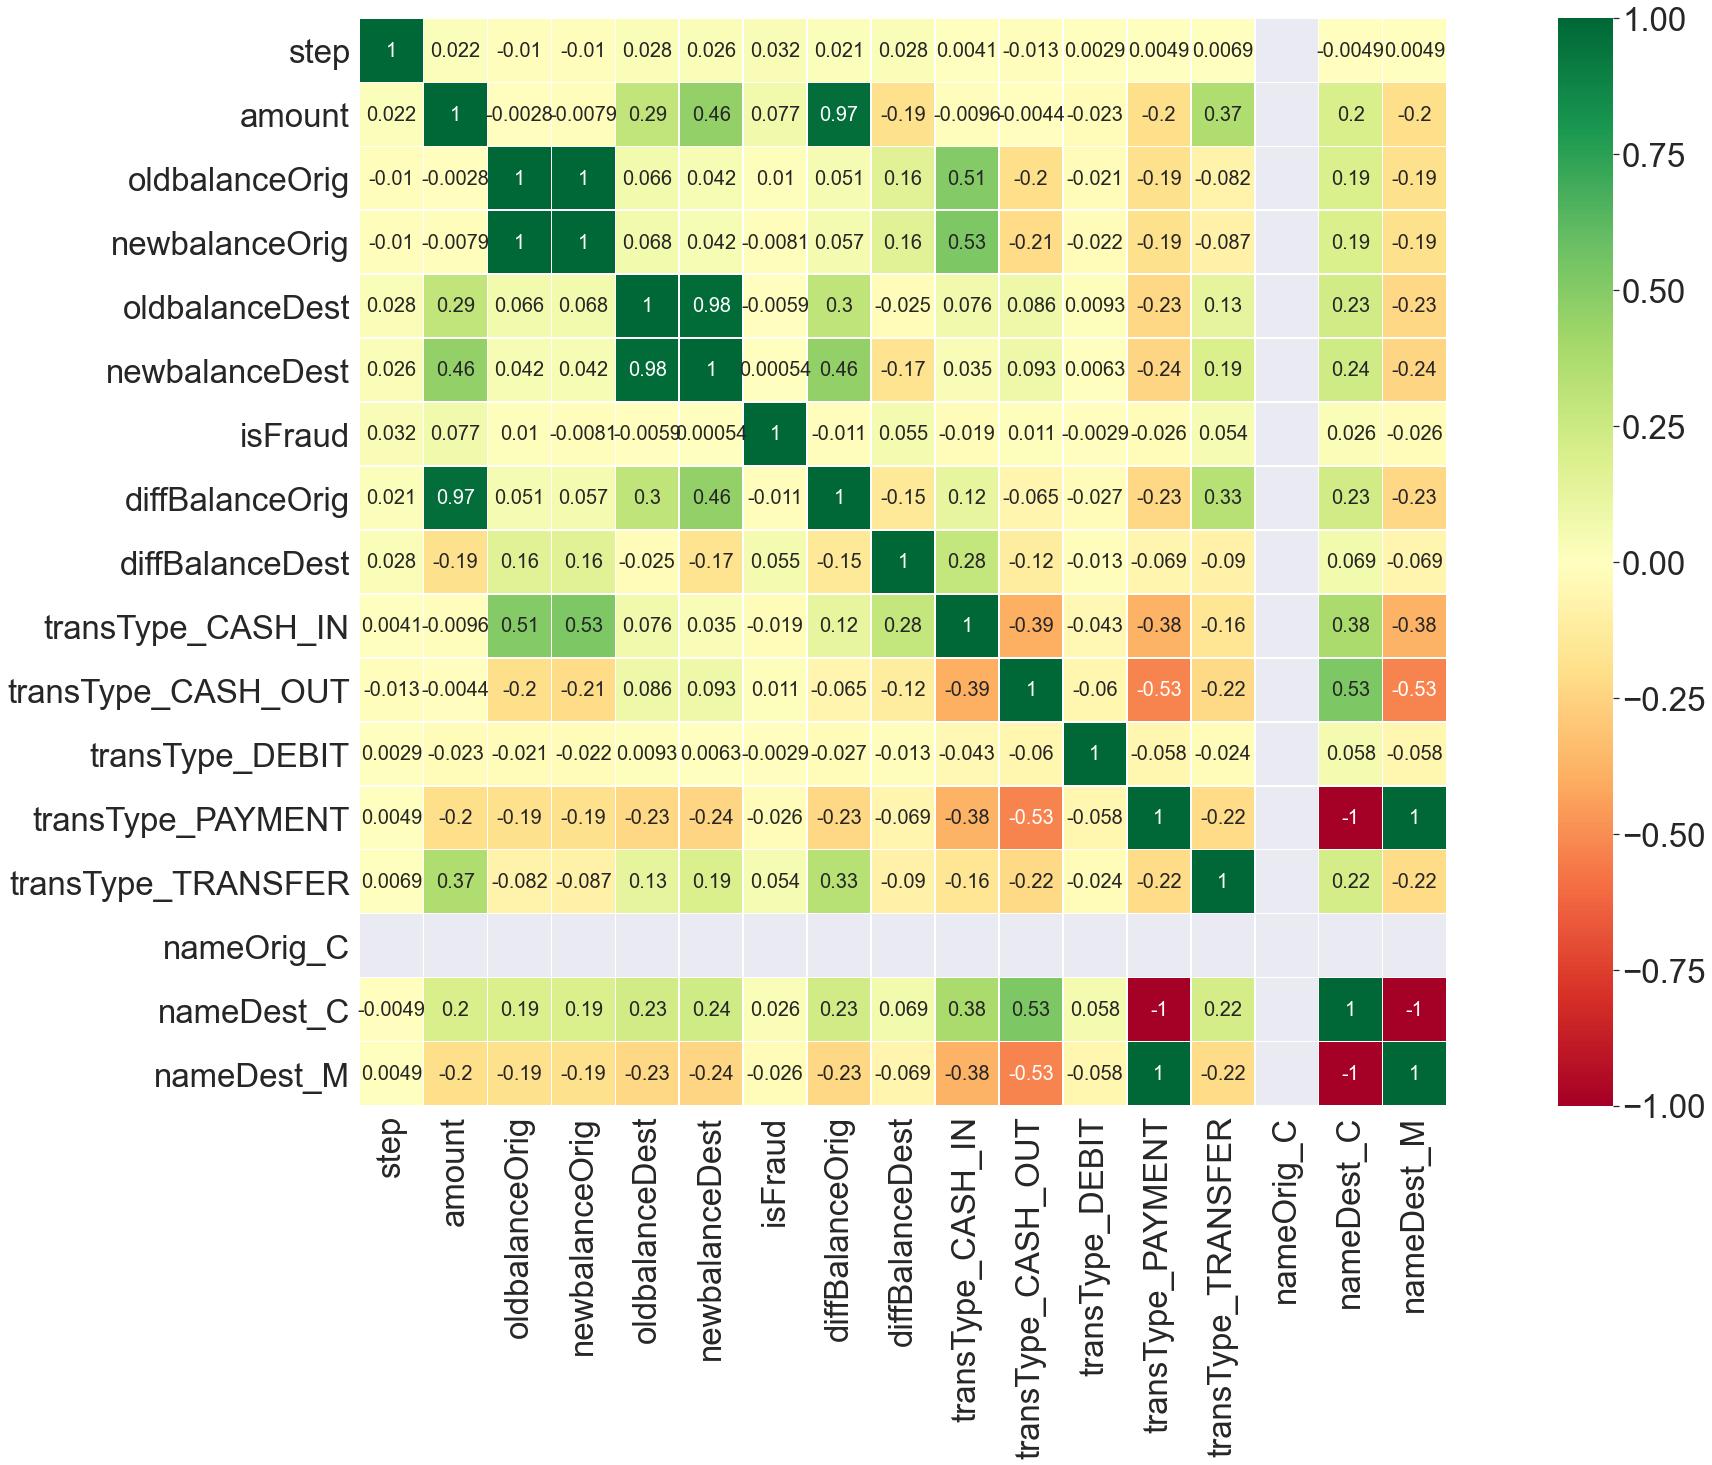

In [28]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(paysim.corr() ,annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='RdYlGn')